In [1]:
import os
import scanpy as sc
import diopy
new_directory = "~/DSCT/src/"
os.chdir(new_directory)
import DSCT_load
import DSCT_train

In [2]:
#data
sc_data=sc.read_h5ad(file = '~/sc_anno_CTX_mouse.h5ad')#reference
st_data=diopy.input.read_h5(file = "~/CTX_mouse.h5")#val

In [4]:
import time

use_select=True
gene_number2=120
anno="Type"


num_classes = len(set(sc_data.obs[anno]))
result_save_path="~/"
model_save_path="~/"
plot_save_path="~/"

print("start")
#start time
start_time = time.time()
sc_data,st_data=DSCT_load.fmap_load(sc_data,st_data,anno,gene_number2,use_select)
print(sc_data.n_vars)
train_num=80
DSCT_train.fmap_train(sc_data,st_data,result_save_path,model_save_path,plot_save_path,train_num,num_classes,anno)
end_time = time.time()
time_diff = end_time-start_time
print("total time")
print(time_diff)
#end time



start


/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/cosg/cosg.py:115: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


**finished identifying marker genes by COSG**
146
Epoch [10/80], Loss: 0.9359
Epoch [20/80], Loss: 0.4752
Epoch [30/80], Loss: 0.3683
Epoch [40/80], Loss: 0.2943
Epoch [50/80], Loss: 0.2545
Epoch [60/80], Loss: 0.2397
Epoch [70/80], Loss: 0.2257
Epoch [80/80], Loss: 0.1931


/data/xyh_desktop/github/DSCT/src/DSCT_train.py:48: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_data.obs["type_integer"] = cell_types_integer


total time
1.8117897510528564


/data/xyh_desktop/github/DSCT/src/DSCT_train.py:147: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  st_data.obs['predicted_classes'] = predicted_labels


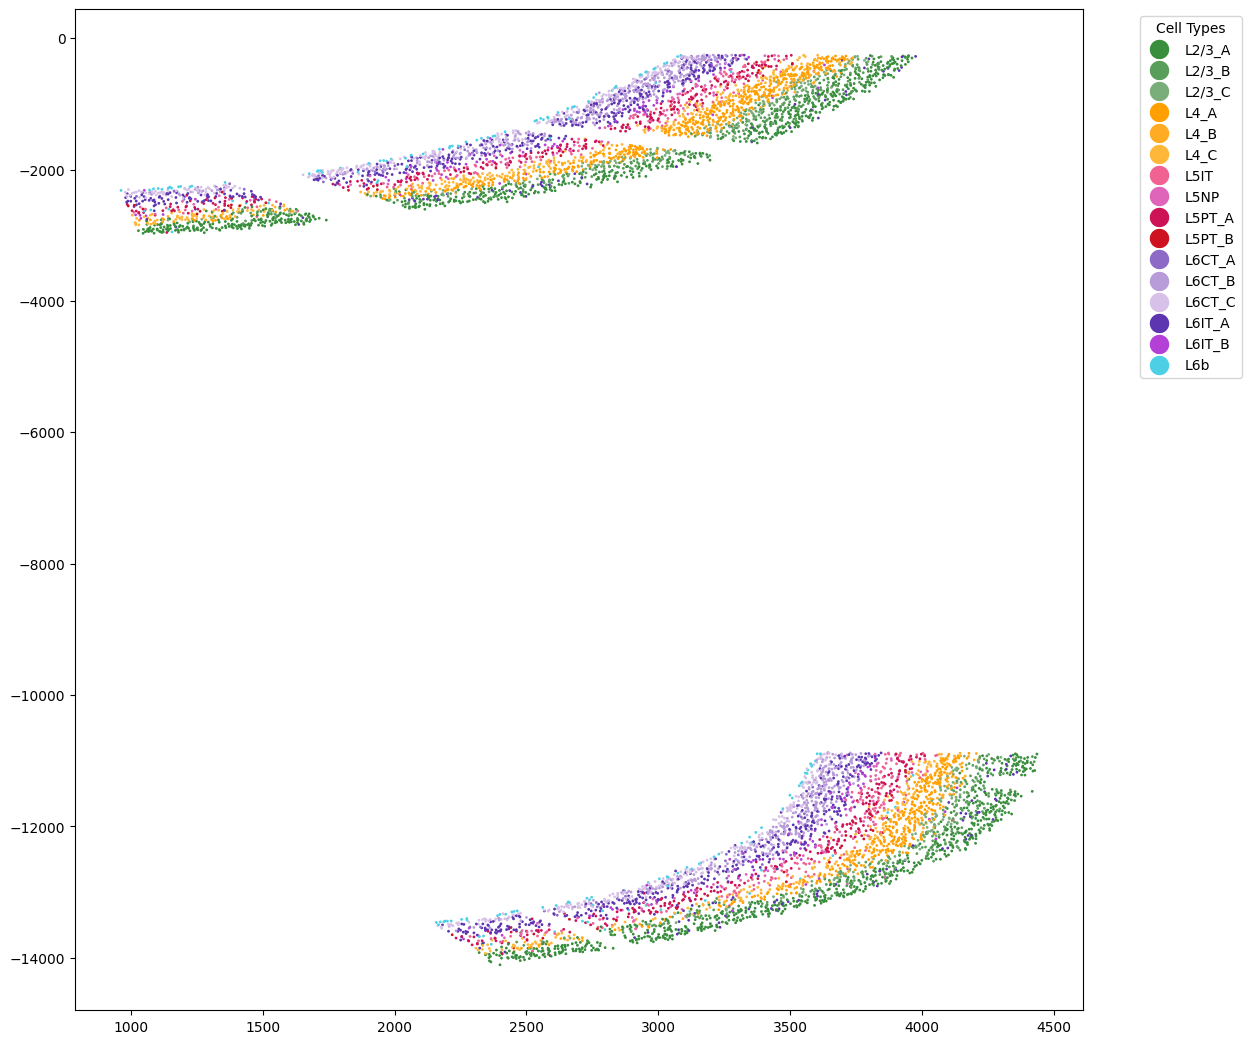

In [5]:
#plot
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

coor_x = st_data.obs['imagerow']
coor_y = st_data.obs['imagecol']
predicted_labels = st_data.obs['predicted_classes']
cell_type_to_color = {

    'L2/3_A': "#388E3C", 
    'L2/3_B': "#5A9E5B", 
    'L2/3_C': "#79AD79", 
    'L4_A': "#FFA000",   
    'L4_B': "#FFAB24",  
    'L4_C': "#FFB739",  
    'L5IT': "#F06292", 
    'L5NP': "#DF65BA",     
    'L5PT_A': "#CE1256",  
    'L5PT_B': "#CE1221", 
    'L6CT_A': "#8D6AC6",    
    'L6CT_B': "#B89BD9", 
    'L6CT_C': "#D7C1E8", 
    'L6IT_A': "#5E35B1",    
    'L6IT_B': "#B540D8",    
    'L6b': "#4DD0E6"       
}


colors = [cell_type_to_color[label] for label in predicted_labels]

fig, ax = plt.subplots(figsize=(13, 13))
scatter = ax.scatter(coor_x, coor_y, c=colors, s=1)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=cell_type, 
                          markerfacecolor=color, markersize=15) 
                   for cell_type, color in cell_type_to_color.items()]
ax.legend(handles=legend_elements, title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

